<a href="https://colab.research.google.com/github/aydenwolgamott/CS257-Activity/blob/main/CS_320_Ayden_Wolgamott_Wine_Linear_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# PyTorch is a machine learning framework that provides tools for
# building and training neural networks.
import torch

# Pandas is a library for data manipulation and analysis,
# providing data structures like DataFrames.
import pandas as pd

# NumPy is a library for numerical computing, offering support for
# arrays and mathematical functions.
import numpy as np

# Seaborn is a data visualization library based on Matplotlib,
# providing a high-level interface for creating informative and
# attractive statistical graphics.
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()

# Access the data and target
X = wine.data
y = wine.target

# Get feature names and target names
feature_names = wine.feature_names
target_names = wine.target_names

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(target_names)}")
print(f"Features: {feature_names}")
print(f"Classes: {target_names}")

Dataset shape: (178, 13)
Number of classes: 3
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: ['class_0' 'class_1' 'class_2']


In [3]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

In [6]:
# # Data (Wine dataset)
df = sns.load_dataset(wine)
df

ValueError: '{'data': {'ids': None, 'features':      Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     0D280_0D315_of_diluted_wines  Proline  
0                            3.92     1065  
1                            3.40     1050  
2                            3.17     1185  
3                            3.45     1480  
4                            2.93      735  
..                            ...      ...  
173                          1.74      740  
174                          1.56      750  
175                          1.56      835  
176                          1.62      840  
177                          1.60      560  

[178 rows x 13 columns], 'targets':      class
0        1
1        1
2        1
3        1
4        1
..     ...
173      3
174      3
175      3
176      3
177      3

[178 rows x 1 columns], 'original':      Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     0D280_0D315_of_diluted_wines  Proline  class  
0                            3.92     1065      1  
1                            3.40     1050      1  
2                            3.17     1185      1  
3                            3.45     1480      1  
4                            2.93      735      1  
..                            ...      ...    ...  
173                          1.74      740      3  
174                          1.56      750      3  
175                          1.56      835      3  
176                          1.62      840      3  
177                          1.60      560      3  

[178 rows x 14 columns], 'headers': Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline', 'class'],
      dtype='object')}, 'metadata': {'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'sha': None, 'corpus': None, 'arxiv': None, 'mag': None, 'acl': None, 'pmid': None, 'pmcid': None}, 'additional_info': {'summary': 'These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. \r\n\r\nI think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.)  I lost it, and b.), I would not know which 13 variables are included in the set.\r\n\r\nThe attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )\r\n1) Alcohol\r\n2) Malic acid\r\n3) Ash\r\n4) Alcalinity of ash  \r\n5) Magnesium\r\n6) Total phenols\r\n7) Flavanoids\r\n8) Nonflavanoid phenols\r\n9) Proanthocyanins\r\n10)Color intensity\r\n11)Hue\r\n12)OD280/OD315 of diluted wines\r\n13)Proline \r\n\r\nIn a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.           ', 'purpose': 'test', 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description': None, 'variable_info': 'All attributes are continuous\r\n\t\r\nNo statistics available, but suggest to standardise variables for certain uses (e.g. for us with classifiers which are NOT scale invariant)\r\n\r\nNOTE: 1st attribute is class identifier (1-3)', 'citation': None}}, 'variables':                             name     role         type demographic  \
0                          class   Target  Categorical        None   
1                        Alcohol  Feature   Continuous        None   
2                      Malicacid  Feature   Continuous        None   
3                            Ash  Feature   Continuous        None   
4              Alcalinity_of_ash  Feature   Continuous        None   
5                      Magnesium  Feature      Integer        None   
6                  Total_phenols  Feature   Continuous        None   
7                     Flavanoids  Feature   Continuous        None   
8           Nonflavanoid_phenols  Feature   Continuous        None   
9                Proanthocyanins  Feature   Continuous        None   
10               Color_intensity  Feature   Continuous        None   
11                           Hue  Feature   Continuous        None   
12  0D280_0D315_of_diluted_wines  Feature   Continuous        None   
13                       Proline  Feature      Integer        None   

   description units missing_values  
0         None  None             no  
1         None  None             no  
2         None  None             no  
3         None  None             no  
4         None  None             no  
5         None  None             no  
6         None  None             no  
7         None  None             no  
8         None  None             no  
9         None  None             no  
10        None  None             no  
11        None  None             no  
12        None  None             no  
13        None  None             no  }' is not one of the example datasets.

**The Wine Dataset**

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.)  I lost it, and b.), I would not know which 13 variables are included in the set.

The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )

1) Alcohol

2) Malic acid

3) Ash

4) Alcalinity of ash

5) Magnesium

6) Total phenols

7) Flavanoids

8) Nonflavanoid phenols

9) Proanthocyanins

10)Color intensity

11)Hue

12)OD280/OD315 of diluted wines

13)Proline

In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.           



### Our Classification Task

In this example, we're performing binary classification, focusing on performing a binary classification based on alcohol content and flavonoids. The task is to pick two classes and use the alcohol and flavonoids features to attempt to separate them with a linear classifier.

Calculate and report accuracy on the dataset. Discuss how well the model separates the classes.

Submit a Colab notebook to Moodle with your code, plots, and brief explanations for each step.
to demonstrate a basic linear classification problem.

This simplified approach allows us to visualize the decision boundary in a 2D plot, making it
easier to understand the concept of linear classification.

In [7]:
# This line creates a boolean mask.
# It checks if each value in the 'species'
# column of the DataFrame is equal to 'setosa'.

# df['species'] == 'setosa'

df['class'] == '1'

NameError: name 'df' is not defined

In [12]:
# Pandas boolean indexing (filtering rows)
# selects rows where the value in the "species" column is equal to
# "Setosa". The expression inside the brackets creates a boolean mask
# (a Series of True/False values). The DataFrame then uses this
# mask to select only the rows where the mask is True.
setosa = df[df['species'] == 'setosa']
virginica = df[df['species'] == 'virginica']

NameError: name 'df' is not defined

In [ ]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot virginica
virginica = df[df['species'] == 'virginica']
ax.scatter(virginica['sepal_length'], virginica['petal_length'],
           color='blue', label='Virginica', marker='o')

# Plot setosa
setosa = df[df['species'] == 'setosa']
ax.scatter(setosa['sepal_length'], setosa['petal_length'],
           color='red', label='Setosa', marker='s')

# Customize the plot
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_title('Iris Classification: Virginica vs Setosa')
ax.legend()

# Show the plot
plt.show()

In [ ]:
# # mean squared error
# def mse(actual, predicted):
#     if len(actual) != len(predicted):
#         raise Exception("actual must be the same size as predicted")

#     total = 0.0
#     for i in range(len(actual)):
#         total += (predicted[i] - actual[i]) * (predicted[i] - actual[i])
#     return total / len(actual)

In [ ]:
# # Calculate the mean squared error for a given dataset and line
# def mse_data(m, b, data):
#     # Get the actual petal lengths from the data
#     actual = list(data['petal_length'])

#     # Calculate the predicted petal lengths using the line equation
#     predicted = [m*x + b for x in list(data['sepal_length'])]

#     # Return the mean squared error
#     return mse(actual, predicted)

In [ ]:
# # Initialize the minimum error to the MSE with a horizontal line at y=0
# min_error = mse_data(0, 0, virginica)

# # Initialize the best slope and intercept
# best_m = 0
# best_b = 0

# # Iterate over possible slopes and intercepts
# for m in np.arange(0.0, 2.0, 0.1):
#     for b in np.arange(0.0, 1.0, 0.1):
#         # Calculate the error for the current line
#         error = mse_data(m, b, virginica)

#         # Update the minimum error and best parameters if the current error is lower
#         if error < min_error:
#             min_error = error
#             best_m = m
#             best_b = b

# # Print the best slope and intercept
# (best_m, best_b)

In [ ]:
# # Create a new figure and axis
# fig, ax = plt.subplots(figsize=(10, 6))

# # Plot virginica
# virginica = df[df['species'] == 'virginica']
# ax.scatter(virginica['sepal_length'], virginica['petal_length'],
#            color='blue', label='Virginica', marker='o')

# # Plot setosa
# setosa = df[df['species'] == 'setosa']
# ax.scatter(setosa['sepal_length'], setosa['petal_length'],
#            color='red', label='Setosa', marker='s')

# # Create the decision boundary line using best_m and best_b
# x = np.linspace(df['sepal_length'].min(), df['sepal_length'].max(), 100)
# y = best_m * x + best_b

# # Plot the decision boundary line
# ax.plot(x, y, color='green', linewidth=2, label='Virginica Fit')

# # Customize the plot
# ax.set_xlabel('Sepal Length (cm)')
# ax.set_ylabel('Petal Length (cm)')
# ax.set_title('Iris Classification: Virginica vs Setosa')
# ax.legend()

# # Show the plot
# plt.show()

# Brute Force linear classification

- Also an introduction to vectorization

In [ ]:
# X = np.array(df['sepal_length'])
# Y = np.array(df['petal_length'])

`np.vectorize` is a function that takes a Python function and converts it into a vectorized function that can operate on NumPy arrays. This is useful for performing operations on entire arrays of data at once, rather than looping through individual elements.

In [ ]:
# # Manufacture a vectorized prediction function for weights y = mx + b
# # m and b are fixed contants when vlinear_predict is called
# # x takes on individual values in an numpy array
# def vlinear_predict_class(m, b):
#     return np.vectorize(lambda x,y: float(y < (m * x + b)))

In [ ]:
# float(True)

In [ ]:
# predictions = vlinear_predict_class(0, 0)(X,Y)
# predictions

In [ ]:
# actual = np.array(df['species'] == 'setosa', dtype=float)
# actual

In [ ]:
# sum(actual != predictions)

In [ ]:
# # Initial prediction using a line with slope 0 and y-intercept 0
# predictions = vlinear_predict_class(0.0, 0)(X, Y)

# # Calculate initial error (number of misclassifications)
# min_error = sum(actual != predictions)

# # Initialize best parameters
# best_m = 0
# best_b = 0

# # Nested loops to try different combinations of slope (m) and y-intercept (b)
# for m in np.arange(0.0, 3.0, 0.1):  # Slope ranges from 0 to 3 in steps of 0.1
#     for b in np.arange(0.0, 3.0, 0.1):  # Y-intercept ranges from 0 to 3 in steps of 0.1
#         # Make predictions using current m and b
#         predictions = vlinear_predict_class(m, b)(X, Y)

#         # Calculate error for current prediction
#         error = sum(actual != predictions)

#         # If current error is less than minimum error found so far
#         if error < min_error:
#             # Update minimum error and best parameters
#             min_error = error
#             best_m = m
#             best_b = b

# # Return the best parameters and the minimum error achieved
# (best_m, best_b, min_error)

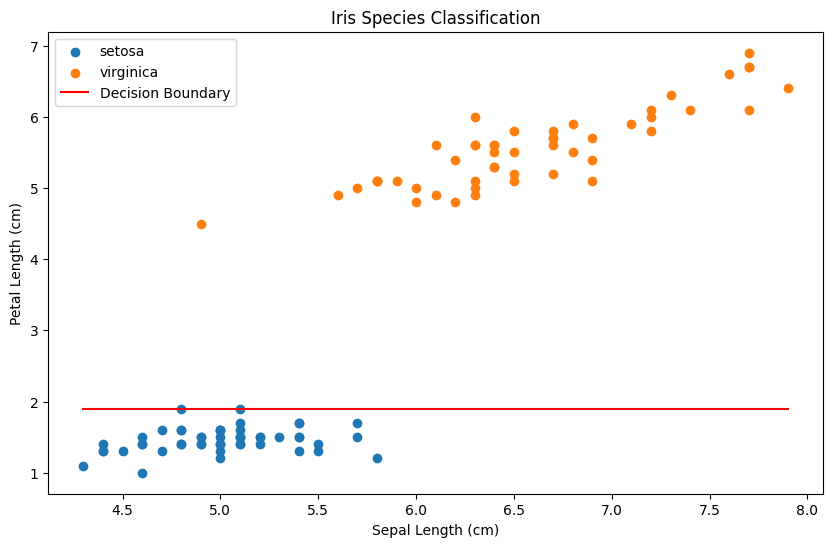

In [ ]:
# # Create a new figure and axis
# fig, ax = plt.subplots(figsize=(10, 6))

# # Plot each species separately
# for species in ['setosa', 'virginica']:
#     subset = df[df['species'] == species]
#     ax.scatter(subset['sepal_length'], subset['petal_length'], label=species)

# # Add the decision boundary line
# x = np.linspace(df['sepal_length'].min(), df['sepal_length'].max(), 100)
# y = best_m * x + best_b
# ax.plot(x, y, 'r-', label='Decision Boundary')

# # Customize the plot
# ax.set_xlabel('Sepal Length (cm)')
# ax.set_ylabel('Petal Length (cm)')
# ax.set_title('Iris Species Classification')
# ax.legend()

# # Show the plot
# plt.show()

In [ ]:
# Filter the dataframe to include only 'setosa' and 'virginica'
df_filtered = df[df['species'].isin(['setosa', 'virginica'])]

# Create binary labels: 1 for 'setosa', 0 for 'virginica'
Y = torch.tensor((df_filtered['species'] == 'setosa').astype(float).values, dtype=torch.float32).reshape(-1, 1)

# Use *BOTH* sepal_length and petal_length, not like the broken version in class!
X = torch.tensor(df_filtered[['sepal_length', 'petal_length']].values, dtype=torch.float32)

In [ ]:
# Define the model (linear boundary)
class LinearClassifier(torch.nn.Module):
    def __init__(self):
        super(LinearClassifier, self).__init__()
        self.linear = nn.Linear(2, 1)  # 2 input features, 1 output
    def forward(self, x):
      return self.linear(x)


In [ ]:
# Initialize the model

import torch.nn as nn

# These values always require fiddling for the dataset.
num_epochs = 10000
learning_rate = 0.01

model = LinearClassifier()

# BCE stands for binary cross entropy
# This works better than MSE (Mean squared Error) for binary classification
# This is a change from what I did in class and we will describe this in
# a couple of weeks. For now, it makes training the network more stable.
criterion = nn.BCEWithLogitsLoss()

# SGD is stochastic gradient descent. This is the "step down the gradient"
# process I was describing in class.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, Y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete!")

Epoch [100/10000], Loss: 0.5670
Epoch [200/10000], Loss: 0.3426
Epoch [300/10000], Loss: 0.2360
Epoch [400/10000], Loss: 0.1773
Epoch [500/10000], Loss: 0.1411
Epoch [600/10000], Loss: 0.1169
Epoch [700/10000], Loss: 0.0996
Epoch [800/10000], Loss: 0.0866
Epoch [900/10000], Loss: 0.0767
Epoch [1000/10000], Loss: 0.0687
Epoch [1100/10000], Loss: 0.0623
Epoch [1200/10000], Loss: 0.0569
Epoch [1300/10000], Loss: 0.0524
Epoch [1400/10000], Loss: 0.0485
Epoch [1500/10000], Loss: 0.0452
Epoch [1600/10000], Loss: 0.0423
Epoch [1700/10000], Loss: 0.0398
Epoch [1800/10000], Loss: 0.0375
Epoch [1900/10000], Loss: 0.0355
Epoch [2000/10000], Loss: 0.0337
Epoch [2100/10000], Loss: 0.0321
Epoch [2200/10000], Loss: 0.0306
Epoch [2300/10000], Loss: 0.0293
Epoch [2400/10000], Loss: 0.0280
Epoch [2500/10000], Loss: 0.0269
Epoch [2600/10000], Loss: 0.0259
Epoch [2700/10000], Loss: 0.0249
Epoch [2800/10000], Loss: 0.0240
Epoch [2900/10000], Loss: 0.0232
Epoch [3000/10000], Loss: 0.0224
Epoch [3100/10000],

In [ ]:
# Get the weights and bias
weights = model.linear.weight.detach().numpy()
bias = model.linear.bias.item()
(weights, bias)

(array([[ 1.8513116, -3.3419979]], dtype=float32), 0.6352800726890564)

In [ ]:
w1, w2 = weights[0]
m = -w1 / w2
b = -bias / w2
(m, b)

(0.5539535, 0.19008990997231645)

Learned line: m = 0.5539535284042358, b = 0.19008990997231645


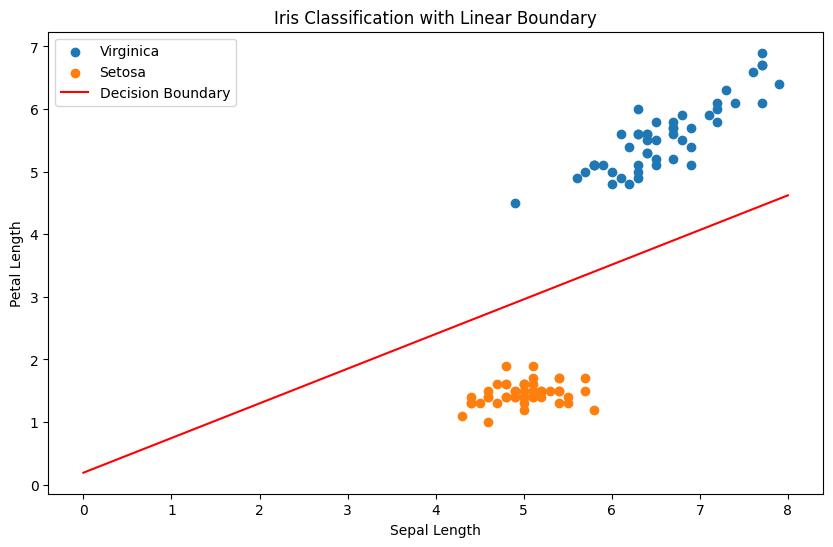

In [ ]:
print(f"Learned line: m = {m}, b = {b}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df[df['species'] == 'virginica']['sepal_length'],
            df[df['species'] == 'virginica']['petal_length'],
            label='Virginica')
plt.scatter(df[df['species'] == 'setosa']['sepal_length'],
            df[df['species'] == 'setosa']['petal_length'],
            label='Setosa')

# Plot decision boundary
x = np.linspace(0, 8, 100)
y = m * x + b
plt.plot(x, y, 'r-', label='Decision Boundary')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.title('Iris Classification with Linear Boundary')
plt.show()
